Name: Kieran Fitzmaurice

# The Stefan-Boltzmann Constant

(Adapted from textbook exercise 5.12)

The Planck theory of thermal radiation tells us that in the (angular) frequency interval $\omega$ to $\omega+d\omega$, a black body of unit area radiates electromagnetically an amount of thermal energy per
second equal to $I(\omega)\,d\omega$, where
$$I(\omega) = \frac{\hbar}{4\pi^2c^2}\frac{\omega^3}{e^{\hbar\omega/k_BT}-1}\,.$$
Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

Plot $I(\omega)$ function for $T=5778$ K, which approximates the thermal radiation emitted by the sun. Choose a large enough range of values for $\omega$ so that the shape of the function is clear for $0<\omega<\infty$. Note that the integral of this function is finite, so your graph should reflect that fact.

/Users/kieranfitzmaurice/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


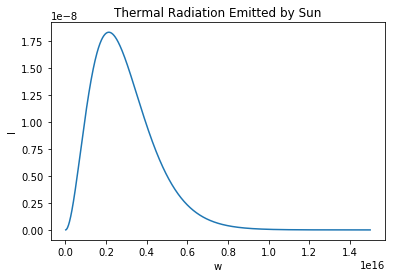

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def I_func(w,T):
    h = 6.62607004e-34 # Planck's Constant (m^2*kg/s)
    h_bar = h/(2*np.pi)
    c = 299792458 # Speed of light (m/s)
    kb = 1.38064852e-23 # Boltzmann Constant (m^2 kg / (s^2 K))
    
    I = (h_bar/(4*np.pi**2*c**2))*(w**3/(np.exp(h_bar*w/(kb*T))-1))
    return(I)
    
T = 5778 # Temperature (K)
w = np.linspace(0.01,0.15e17,1000)
I = I_func(w,T)

plt.plot(w,I)
plt.xlabel("w")
plt.ylabel("I")
plt.title("Thermal Radiation Emitted by Sun")
plt.show()



    
    

It follows that the total energy per unit area radiated by a black body is
$$W = \int_0^\infty I(\omega)\,d\omega= \frac{k_B^4 T^4}{4\pi^2c^2\hbar^3} \int_0^\infty \frac{x^3}{e^x-1}\,dx\,.$$

However, even before Planck gave his theory of thermal radiation around the turn of the 20th century, it was known that the total energy $W$ given off by a black body per unit area per second followed Stefan's law: $W = \sigma T^4$, where $\sigma$ is the Stefan-Boltzmann constant.

Evaluate the integral above using any integrator to compute a value for the Stefan-Boltzmann constant (in SI units) accurate to at least three significant figures. (You can find the accepted value in books or on-line.)

In [2]:
import scipy.integrate as si

h = 6.62607004e-34 # Planck's Constant (m^2*kg/s)
h_bar = h/(2*np.pi)
c = 299792458 # Speed of light (m/s)
kb = 1.38064852e-23 # Boltzmann Constant (m^2 kg / (s^2 K))

C = ((kb**4)*(T**4))/(4*(np.pi**2)*(c**2)*h_bar**3)

f = lambda x: (x**3)/(np.exp(x)-1)
    
integ_f,err = si.quad(f,0,np.inf, epsrel = 0.001)
W = C*integ_f

sigma = W/T**4
print("Stefan-Boltzmann Constant = %e W/(m^2 K^4)" % sigma)

Stefan-Boltzmann Constant = 5.670367e-08 W/(m^2 K^4)


/Users/kieranfitzmaurice/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


# The Gamma Function

(Adapted from textbook exercise 5.17)

A commonly occurring function in physics calculations is the gamma function $\Gamma(a)$, which is defined by the integral
$$\Gamma(a) = \int_0^\infty x^{a-1} e^{-x} \,dx\,.$$
There is no closed-form expression for the gamma function, but one can calculate its value for given $a$ by performing the integral above numerically. You have to be careful how you do it, however, if you wish to get an accurate answer.

Write a program to make a graph of the value of the integrand $x^{a-1}  e^{-x}$ as a function of $x$ from $x=0$ to $x=5$, with three separate curves for $a=2$, 3, and 4, all on the same axes. You should find that the integrand starts at zero, rises to a maximum, and then decays again for each curve.

In [3]:
%reset -f

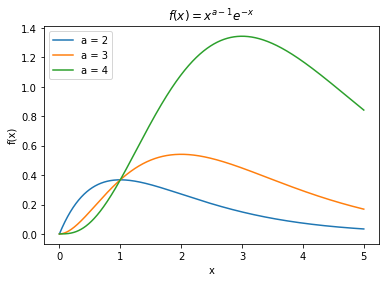

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

f = lambda x,a: x**(a-1)*np.exp(-1*x)

x = np.linspace(0,5,1000)
a2 = f(x,2)
a3 = f(x,3)
a4 = f(x,4)

plt.plot(x,a2,label="a = 2")
plt.plot(x,a3,label="a = 3")
plt.plot(x,a4,label="a = 4")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$ f(x) = x^{a-1}e^{-x}$")
plt.legend()
plt.show()

Most of the area under the integrand falls near the maximum at $x=a-1$, so to get an accurate value of the gamma function we need to do a good job of this part of the integral. We can change the integral from 0 to $\infty$ to one over a finite range from 0 to 1 using the standard change of variables, $z=x/(1+x)$, but this tends to squash the peak towards the edge of the $[0,1]$ range and does a poor job of evaluating the integral accurately. We can do a better job by making a different change of variables that puts the peak in the middle of the integration range, around $\tfrac12$. We will use the change of variables:
$$z = \frac{x}{c+x}\,.$$

- What is the appropriate choice of the parameter $c$ that puts the peak of the integrand for the gamma function at $z=\tfrac12$?

- Before we can calculate the gamma function, there is another detail we need to attend to. The integrand $x^{a-1} e^{-x}$ can be difficult to evaluate because the factor $x^{a-1}$ can become very large and the factor $e^{-x}$ very small, causing numerical overflow or underflow, or both, for some values of $x$.  Write
$$x^{a-1}=e^{(a-1)\ln x}$$
to derive an alternative expression for the integrand that does not suffer from these problems (or at least not so much).

- Now, using the change of variables above and the value of $c$ you have chosen, write a user-defined function `gamma(a)` to calculate the gamma function for arbitrary argument $a$. Use `scipy.integrate.fixed_quad` as the integrator. Test your function by using it to calculate and print the value of $\Gamma(\frac32)$, which is known to be equal to $\frac12\sqrt{\pi}\approx0.886$. Adjust the number of integration points until you are suitably close to this value.

(As it so happens, `scipy.integrate.quad` can handle this function as-is without the change of variables. However, like any integrator, even `quad` will choke on some functions. The purpose of this exercise is to practice with changing variables, which is a go-to technique to convert difficult functions into a more manageable form.)

In [5]:
# Set first derivative of integrand equal to zero
# Subsitute x = z*c/(1-z) into equation, and solve for c when z = 1/2
# In order to have peak of integrand at 1/2, c = a-1
# x = z*(a-1)/(1-z)
# dx = (((a-1)(1-z) + z(a-1))/(1-z)**2) dz
# x^(a-1) = e^((a-1)*ln(x))
# g = x^(a-1)*e^(-x) ==> e^((a-1)*ln(x) - x)
# g = e^((a-1)*ln(z*(a-1)/(1-z)) - z*(a-1)/(1-z))

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

def gamma(a):
    
    def g(z,a):
        x = z*(a-1)/(1-z)
        dxdz = (((a-1)*(1-z) + z*(a-1))/(1-z)**2)
        fx = np.exp((a-1)*np.log(x) - x)
        fz = fx*dxdz
        return(fz)
        
    G,not_err = si.fixed_quad(g,0,1,n=50,args = (a,))
    return(G)

gamma(3/2)

0.8862272081548288

For integer values of $a$ it can be shown that $\Gamma(a)$ is equal to the factorial of $a-1$. Use your Python function to calculate $\Gamma(3)$, $\Gamma(6)$, and $\Gamma(10)$. You should get answers closely equal to $2!=2$, $5!=120$, and $9!=362\,880$.

In [6]:
print("gamma(3) =",gamma(3))
print("gamma(6) =",gamma(6))
print("gamma(10) =",gamma(10))

gamma(3) = 2.0
gamma(6) = 120.0
gamma(10) = 362880.0


# Gravitational Pull of a Uniform Sheet

(Adapted from textbook exercise 5.14)

A uniform square sheet of metal is floating motionless in space:
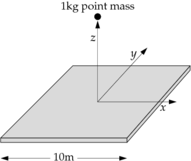
The sheet is 10 m on a side and of negligible thickness, and it has a mass of 10 metric tonnes.

Consider the gravitational force due to the plate felt by a point mass of 1 kg a distance $z$ from the center of the square, in the direction perpendicular to the sheet, as shown above. The component of the force along the $z$-axis is
$$F_z = G\sigma z \int_{-L/2}^{L/2}\int_{-L/2}^{L/2} \frac{dx\,dy}{(x^2+y^2+z^2)^{3/2}}\,,$$
where $G=6.674\times10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$ is Newton's gravitational constant and $\sigma$ is the mass per unit area of the sheet.

Write a program to calculate and plot the force as a function of $z$ from $z=0$ to $z=10$ m. (You may have to slightly adjust this range if you run into trouble with `ZeroDivisionError`.)

You should see a smooth curve, except at very small values of $z$, where you may see the force drop off suddenly to zero. This drop is not a real effect, but an artifact of the way we have done the calculation. 

In [7]:
%reset -f

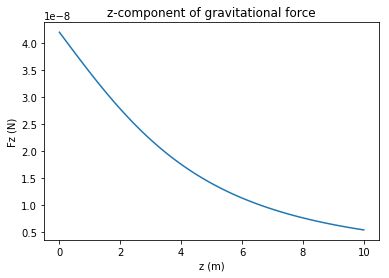

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

def Fz(z):
    L = 10 # m
    m = 1000*10 # kg
    sigma = m/L**2 # mass per area (kg/m^2)
    G = 6.674e-11 # Newton's Gravitiational Constant (m^3/(kg s^2))
    
    f = lambda x,y,z: 1/(x**2 + y**2 + z**2)**1.5
    
    I,err = si.dblquad(f,-L/2,L/2,lambda x: -L/2, lambda x: L/2, args = (z,))
    F_z = G*sigma*z*I
    return(F_z)

z = np.linspace(0.001,10,100)
F_z = [Fz(zz) for zz in z]

plt.plot(z,F_z)
plt.xlabel("z (m)")
plt.ylabel("Fz (N)")
plt.title("z-component of gravitational force")
plt.show()

# Electric Field of a Charge Distribution

As you saw in an exercise a few weeks ago, the electric potential $V$ of a point charge $q$ as measured from distance $r$ away is given by
$$V(x,y)=k\frac{q}{\sqrt{(x-x_0)^2+(y-y_0)^2}}\,,$$
where $V$ has units of volts, $k=8.99\times10^{9}$ Nm$^2$C$^{-2}$ is the electrostatic constant, and $(x_0, y_0)$ is the location of the point charge. In cases where there is more than one point charge, the electric potential is given by the sum of the potentials from each point charge.

In many cases, one of the easiest ways to find the electric field is to calculate the gradient of the electric potential
$$\vec{E}=-\vec{\nabla}V\,.$$

Write a program that generates 4 random point charges, located somewhere in a 1 meter $\times$ 1 meter plane. Randomly determine a charge for each of the four point charges in the range $-2$ nC to 2 nC.

Calculate the electric potential for these point charges, and then take the gradient of the electric potential to determine the electric field everywhere in the 1 meter $\times$ 1 meter plane. Plot the logarithm of the magnitude of $\vec{E}$ using `imshow` on a $101\times101$ grid (one grid point every 1 cm) and the direction of $\vec{E}$ using `quiver` on a $21\times21$ grid (one grid point every 5 cm).

In [9]:
%reset -f

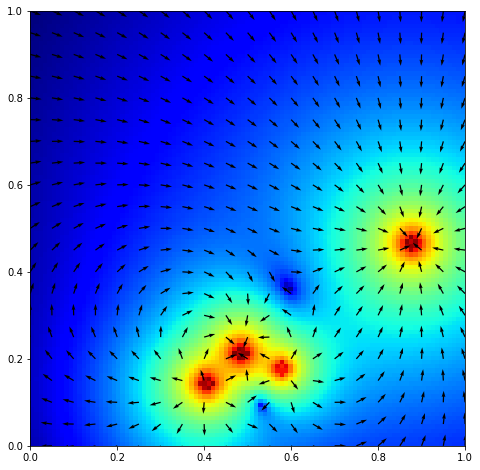

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

k = 8.99e9 # N m^2 / C^2
f = lambda x,y,x0,y0,q0: k*q0/np.sqrt((x-x0)**2 + (y-y0)**2)

#Point charges
numpoints = 4
x0 = np.random.rand(numpoints)
y0 = np.random.rand(numpoints)
q0 = (np.random.rand(numpoints)-0.5)*4

x = np.linspace(0,1,101)
y = np.linspace(0,1,101)

xx,yy = np.meshgrid(x,y)

V = np.zeros((101,101))

for i in range(0,numpoints):
    V = V + f(xx,yy,x0[i],y0[i],q0[i])

h = 0.01
dVdy,dVdx = np.gradient(V,h)
dVdy = -1*dVdy
dVdx = -1*dVdx
E = np.sqrt(dVdy**2 + dVdx**2)
unit_Ey = dVdy/E
unit_Ex = dVdx/E

plt.figure(figsize = (8,8))
plt.imshow(np.log(E),cmap = "jet", origin = "lower", extent = (0,1,0,1))
plt.quiver(xx[::5,::5], yy[::5,::5], 1.5*unit_Ex[::5, ::5], 1.5*unit_Ey[::5, ::5])
plt.show()